# Aplicando Python para análisis de precios: simulación de escenarios futuros de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

> En la clase anterior vimos como importar datos de activos de la base de datos de Yahoo Finance usando el paquete pandas-datareader. En esta clase, veremos como pronosticar escenarios de evolución de precios, suponiendo que los rendimientos diarios se distribuyen normalmente. Como esta evolución de precios es aleatoria, utilizaremos la simulación montecarlo (hacer muchas simulaciones de escenarios de evolución de precios) para obtener probabilidades de que los precios de cierre estén encima de un valor umbral y tomar decisiones con base en estas probabilidades.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/

## 1. Recordemos como descargar datos...

Antes que nada, para poder hacer simular escenarios de predicción de precios, vamos a recordar lo que hicimos en la clase pasada de descargar los datos de Yahoo Finance, utilizando el paquete `data` de la librería `pandas_datareader`.

Esta vez, utilizaremos los datos de precios de cierre ajustados de activos de la compañía Apple en el año 2016 para nuestra aplicación.

In [ ]:
# Instalación del paquete

# conda install pandas-datareader
# pip install pandas-datareader

In [2]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [50]:
def get_close(names,start,end):
    return yf.download(names,start=start,end=end)[["Adj Close"]]

In [7]:
aapl= get_close("AAPL","2016-01-01","2016-12-31")
aapl

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2016-01-04 00:00:00-05:00,23.946911
2016-01-05 00:00:00-05:00,23.346825
2016-01-06 00:00:00-05:00,22.889938
2016-01-07 00:00:00-05:00,21.923874
2016-01-08 00:00:00-05:00,22.039804
...,...
2016-12-23 00:00:00-05:00,27.075239
2016-12-27 00:00:00-05:00,27.247190
2016-12-28 00:00:00-05:00,27.131006


## 2. Simulación de rendimientos diarios

Recordemos que los precios diarios de cierre ajustados no son un proceso estocástico estacionario, pero los rendimientos diarios si lo son. Por tanto calculamos los rendimientos a partir de los precios de cierre, obtenemos sus propiedades estadísticas muestrales y proyectamos los rendimientos. Luego, obtenemos la proyección de los precios.

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el cambio porcentual

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}\approx \ln\left(\frac{S_t}{S_{t-1}}\right)=r_t.
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

Además, supusimos que los rendimientos diarios eran una variable aleatoria con distribución normal (que se caracteriza con su media y varianza). Por tanto obtenemos la media y desviación estandar muestrales. Hagamos una función que retorne lo anterior.

In [46]:
R=aapl.pct_change()
R

,Adj Close
Date,
2016-01-04 00:00:00-05:00,NaN
2016-01-05 00:00:00-05:00,-0.025059
2016-01-06 00:00:00-05:00,-0.019570
2016-01-07 00:00:00-05:00,-0.042205
2016-01-08 00:00:00-05:00,0.005288
...,...
2016-12-23 00:00:00-05:00,0.001978
2016-12-27 00:00:00-05:00,0.006351
2016-12-28 00:00:00-05:00,-0.004264


In [11]:
ret.mean()

Adj Close    0.000574
dtype: float64

In [12]:
ret.std()

Adj Close    0.014731
dtype: float64

Entonces, suponemos que el cambio porcentual de los precios (rendimientos diarios) tiene una distribución normal.

¿Cómo se caracteriza una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)?

(array([29., 87., 83., 42., 10.]),
 array([-0.0339831 , -0.01866629, -0.00334948,  0.01196732,  0.02728413,
         0.04260094]),
 <BarContainer object of 5 artists>)

<Figure size 640x480 with 0 Axes>

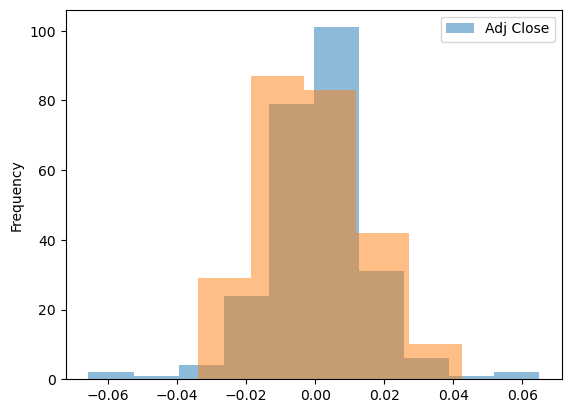

In [15]:
import numpy as no
sim_r= np.random.normal(ret.mean(),ret.std(), 251)

plt.figure()
ret.plot.hist(alpha=0.5)
plt.hist(sim_r,alpha=0.5,bins=5)

In [1]:
def simR(media,std,start,dias,N):
    sim_R= np.random.normal(media,std,size=(dias,N))+1
    fechas= pd.date_range(start,periods=dias)
    return pd.DataFrame(sim_R,index=fechas)

In [31]:
aapl.iloc[-1]

Adj Close    26.912582
Name: 2016-12-30 00:00:00-05:00, dtype: float64

In [47]:
sim_R=simR(R.mean(), R.std(),"2017-01-01",10,100)
sim_R

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,0.998139,0.998191,0.975855,1.020215,1.006965,0.999565,0.985835,1.004538,1.003747,0.999867,...,1.010096,1.007576,1.004160,0.966147,0.995286,0.982403,0.983276,0.987845,1.000250,1.009823
2017-01-02,1.022015,1.010626,1.000974,0.999337,1.007906,1.011236,1.020457,1.009063,0.992220,1.009923,...,1.019165,0.988765,0.991485,1.010492,1.022836,1.010318,1.004113,1.009551,1.001323,1.022629
2017-01-03,1.023602,0.998578,1.028807,1.006878,1.008596,0.990320,1.008896,1.009744,0.991344,1.028522,...,0.999373,1.011476,0.987138,1.011869,0.992571,0.989299,0.993883,0.990161,0.999955,1.005806
2017-01-04,0.989348,1.006585,1.006218,1.001007,0.981810,1.001196,1.009472,1.010326,1.014157,1.003801,...,0.986120,1.003752,0.984824,1.013902,0.991319,0.997568,0.991939,1.030871,1.008744,0.995694
2017-01-05,0.991844,1.005261,1.029167,1.020720,0.980158,0.979633,0.987921,1.004497,1.024821,0.999934,...,1.018099,0.973505,1.003943,1.004584,1.017122,1.018834,0.981234,0.991241,1.021320,0.993937
2017-01-06,1.001488,1.024017,1.033936,0.990597,0.993820,1.020626,1.020259,0.984910,1.000445,1.024960,...,1.006772,1.012833,1.018085,0.994639,0.979201,1.008235,0.989527,1.038021,1.013618,0.987264
2017-01-07,1.018738,1.009292,0.995245,1.006757,0.985604,0.973105,1.003581,0.988227,0.994543,0.988723,...,0.992707,0.999701,1.013070,1.020054,0.996621,1.012944,0.991963,0.996318,1.003506,0.992518
2017-01-08,1.031464,0.991548,1.022146,0.995910,0.975665,0.987463,0.994912,0.989913,1.006947,0.993009,...,1.002151,0.999865,1.033033,1.001001,0.999214,0.987985,1.029983,1.001858,0.991869,0.988606
2017-01-09,1.003449,1.007012,1.007906,0.985348,0.999648,1.022089,1.007715,0.991834,0.990947,1.009089,...,1.008739,0.981692,1.015024,0.984733,0.985510,0.983964,1.025393,1.034996,0.971987,0.999460
2017-01-10,1.006120,1.013209,1.023885,1.010107,1.019622,1.002716,0.975783,1.011457,0.988267,0.989498,...,1.004232,0.981183,0.992806,1.014776,1.013213,0.970501,1.017785,1.039197,0.998864,0.989341


In [48]:
precios_simulados=sim_R.cumprod()*26.912583
precios_simulados

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,26.862510,26.863893,26.262783,27.456631,27.100034,26.900871,26.531370,27.034725,27.013435,26.909007,...,27.184290,27.116474,27.024541,26.001523,26.785705,26.439013,26.462506,26.585471,26.919299,27.176935
2017-01-02,27.453875,27.149356,26.288350,27.438414,27.314295,27.203118,27.074120,27.279744,26.803267,27.176018,...,27.705273,26.811822,26.794439,26.274334,27.397371,26.711817,26.571339,26.839392,26.954913,27.791930
2017-01-03,28.101831,27.110739,27.045646,27.627148,27.549082,26.939795,27.314962,27.545570,26.571257,27.951139,...,27.687915,27.119507,26.449802,26.586192,27.193834,26.425972,26.408792,26.575319,26.953695,27.953294
2017-01-04,27.802483,27.289256,27.213811,27.654981,27.047968,26.972004,27.573687,27.830009,26.947425,28.057388,...,27.303618,27.221264,26.048390,26.955786,26.957772,26.361708,26.195911,27.395715,27.189379,27.832921
2017-01-05,27.575719,27.432815,28.007546,28.228006,26.511284,26.422659,27.240623,27.955149,27.616299,28.055525,...,27.797780,26.500049,26.151099,27.079349,27.419340,26.858196,25.704316,27.155746,27.769053,27.664160
2017-01-06,27.616753,28.091659,28.958005,27.962564,26.347438,26.967654,27.792496,27.533299,27.628598,28.755783,...,27.986024,26.840119,26.624036,26.934167,26.849056,27.079366,25.435127,28.188232,28.147205,27.311842
2017-01-07,28.134249,28.352684,28.820321,28.151502,25.968140,26.242368,27.892013,27.209146,27.477818,28.431503,...,27.781917,26.832093,26.971999,27.474299,26.758326,27.429872,25.230712,28.084455,28.245894,27.107505
2017-01-08,29.019463,28.113045,29.458582,28.036351,25.336193,25.913379,27.750111,26.934675,27.668719,28.232729,...,27.841683,26.828472,27.862965,27.501800,26.737281,27.100304,25.987215,28.136643,28.016240,26.798637
2017-01-09,29.119561,28.310180,29.691489,27.625569,25.327271,26.485781,27.964197,26.714717,27.418239,28.489341,...,28.084999,26.337287,28.281569,27.081926,26.349846,26.665728,26.647110,29.121304,27.231424,26.784165
2017-01-10,29.297770,28.684131,30.400665,27.904789,25.824255,26.557727,27.286999,27.020794,27.096545,28.190145,...,28.203860,25.841687,28.078123,27.482097,26.698011,25.879122,27.121021,30.262768,27.200490,26.498676


In [50]:
precios_simulados.mean(axis=1)

2017-01-01    26.941226
2017-01-02    26.978972
2017-01-03    27.081301
2017-01-04    27.120057
2017-01-05    27.087130
2017-01-06    27.132273
2017-01-07    27.115240
2017-01-08    27.136568
2017-01-09    27.140146
2017-01-10    27.131075
Freq: D, dtype: float64

Habiendo caracterizado los rendimientos diarios como una variable aleatoria normal con la media y la varianza muestral obtenida de los datos desde 2016, podemos generar números aleatorios con estas características para simular el comportamiento de los precios de cierre de las acciones en el 2021 (hay un supuesto de que las cosas no cambiarán fundamentalmente).

Sin embargo, cada simulación que hagamos nos conducirá a distintos resultados (los precios siguen evolucionando aleatoriamente). Entonces, lo que haremos es simular varios escenarios para así ver alguna tendencia y tomar decisiones.

Hagamos una una función que simule varios escenarios de rendimientos diarios y que devuelva un dataframe con esta simulación.

## 3. Proyección de precios de cierre

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$, donde $p_{-1}$ es el último precio reportado en el 2018.

Con los rendimientos, calculamos los precios de cierre...

In [51]:
sim_R=simR(R.mean(), R.std(),"2017-01-01",100,100000)

## 4. Probabilidad Precio-Umbral

Ya que tenemos muchos escenarios de precios proyectados, podemos ver varias cosas. Por ejemplo, ¿cuál es la probabilidad de que el precio de cierre sobrepase algún valor umbral en algún momento?

In [57]:
sim_R=simR(R.mean(), R.std(),"2017-01-01",100,100000)
(sim_R.cumprod()*26.912588>28).mean(axis=1)

2017-01-01    0.00346
2017-01-02    0.03101
2017-01-03    0.06564
2017-01-04    0.09978
2017-01-05    0.12854
               ...   
2017-04-06    0.51409
2017-04-07    0.51567
2017-04-08    0.51714
2017-04-09    0.51760
2017-04-10    0.51876
Freq: D, Length: 100, dtype: float64

In [ ]:
26.91

___
Entonces, ya aprendimos a bajar datos con pandas-datareader. En específico, a partir de los precios de cierre ajustados obtuvimos los rendimientos diarios.

Suponiendo que los rendimientos diarios son un proceso estocástico estacionario de distribución normal, pudimos caracaterizarlo y proyectar varios escenarios de evolución de los precios (montecarlo).

Con estas proyecciones pudimos calcular probabilidades de sobrepasar cierto precio umbral: toma de decisiones.

## Actividad 06 Análisis de datos

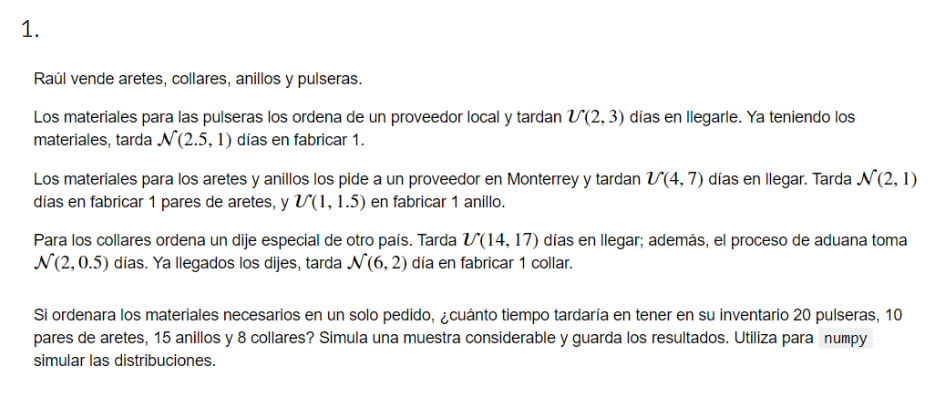

In [23]:
import numpy as np
import pandas as pd

llegada_pulseras= np.random.uniform(2,3,N)
llegada_pulseras.mean()

2.495103605111972

In [21]:

N=10000
pulseras= pd.DataFrame(np.random.normal(2.5,1,size=(20,N)))
pulseras

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.544651,2.116095,2.000184,3.368739,4.115040,0.808706,4.784197,1.933486,2.555707,3.984921,...,1.150272,4.737662,2.267844,2.132459,1.608305,3.009990,4.394802,2.590603,0.762539,2.499530
1,2.372703,2.364386,3.681088,3.157159,1.978345,2.519188,2.179918,2.994696,2.311396,2.536184,...,4.887211,0.235626,3.239045,3.103424,1.919764,0.698545,1.871047,1.781520,3.774995,2.486415
2,1.570858,1.755919,2.052850,2.707687,2.321590,3.064397,2.879545,4.907631,3.582402,1.945935,...,4.206861,2.402459,2.857447,3.276000,2.430893,3.537646,3.223609,2.388653,3.469300,3.178203
3,3.431484,2.848435,2.281508,1.466192,2.210649,2.836856,2.225006,2.537620,3.924102,1.784211,...,1.801324,3.939452,3.249534,-0.236498,1.971062,3.127722,2.470972,2.226909,1.911088,-0.655997
4,1.966499,1.458001,1.726725,0.724653,2.758481,1.649273,2.336143,2.302005,2.602449,2.864135,...,2.017536,4.213816,2.466396,2.639426,2.719815,2.763797,2.355300,2.791820,1.042959,2.986131
5,1.203857,2.175731,1.897950,3.342856,3.510106,1.161458,3.140631,2.872890,1.469190,2.324265,...,1.588305,1.511482,3.263157,4.525987,2.232496,2.164968,1.838497,2.698609,0.643676,2.357878
6,4.225842,1.692794,2.521129,2.169577,3.944730,2.957231,4.258616,4.526783,1.951507,3.312245,...,2.604268,2.515967,1.546386,1.251497,3.100851,1.773525,1.444235,2.742235,1.975557,2.914286
7,1.889037,1.470496,3.569151,2.604973,2.495972,2.525630,2.911171,3.495770,2.012879,2.100579,...,3.472818,1.745566,2.994181,2.410148,3.773824,1.733085,3.393349,1.729875,2.959313,2.977892
8,2.151319,3.578328,2.616263,2.749041,2.492675,3.633929,3.154362,3.071572,3.974152,3.803881,...,1.279354,2.547331,3.973365,2.294465,2.188079,-0.738372,0.997811,3.391253,2.568965,2.339710
9,2.529066,3.826410,3.697467,1.923457,2.192039,2.516605,3.641746,1.305924,3.623817,2.226388,...,3.791357,2.172368,2.105467,2.546320,2.690833,3.781798,2.927471,2.528803,2.456330,2.938275


In [24]:
tiempo_pulseras= (pulseras.sum()).mean()+ llegada_pulseras.mean()
tiempo_pulseras

52.45521920853847

In [27]:
llegada_aretesanillos=np.random.uniform(4,7,N)
aretes=  pd.DataFrame(np.random.normal(2,1,size=(10,N)))
aretes

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.751581,1.204703,0.976974,2.176535,1.601634,1.643312,2.284707,1.590076,2.023839,2.501527,...,1.248027,1.520774,2.884554,2.964401,2.853541,0.430408,3.652960,2.475664,1.457020,2.409102
1,1.470823,1.269961,1.863705,1.282824,1.192635,1.792322,2.709657,2.606039,1.921072,3.834412,...,2.276370,1.587328,0.520867,2.793356,0.164920,2.624360,0.786328,3.136398,2.600832,1.951817
2,0.760932,2.428764,1.421453,1.478755,2.853093,2.216798,2.058318,2.755792,2.149533,1.762940,...,2.963794,0.501791,1.311906,1.321765,1.040582,2.175675,2.758504,2.922039,0.075869,2.767314
3,1.769589,4.790924,1.555102,3.033294,2.260674,3.456056,0.607315,0.054114,3.314353,2.520301,...,1.741305,0.266500,1.626195,3.788480,0.630178,3.954023,0.089648,1.845446,2.028615,1.228725
4,1.337732,3.857043,2.757859,2.903865,1.364815,2.457513,4.141531,2.611717,3.867727,1.895656,...,1.146157,2.999705,2.741898,2.088659,2.342667,3.844307,1.974820,2.173911,1.620277,2.597333
5,1.809034,2.280925,2.143368,1.896771,0.628428,1.412554,1.340134,3.132642,3.168040,1.648806,...,2.339778,1.349630,1.320839,1.957371,0.963237,2.159569,0.935170,1.261679,3.634244,3.794424
6,1.873338,2.918463,2.839038,2.343973,1.672272,1.932188,2.029351,1.587740,2.163218,0.825102,...,2.468276,2.157271,3.547687,3.349172,1.832636,1.389487,0.863776,1.714361,0.693236,0.497162
7,0.865965,3.168673,1.545975,1.099100,0.996394,1.374460,2.391517,2.608827,3.109732,1.890872,...,4.178482,0.215926,1.560480,0.076991,1.201370,3.501946,1.994425,-0.304158,0.907258,1.646121
8,1.903632,2.021338,1.042460,2.942519,1.386705,0.850516,2.246874,3.475171,-0.007012,1.211061,...,3.056167,2.278265,1.123383,0.005484,1.916736,1.654698,2.161451,2.157684,2.338525,0.801592
9,1.092984,1.323802,2.897411,1.759445,2.492231,2.271383,2.079703,2.583680,1.141612,1.408783,...,2.548485,2.277787,2.138247,1.121720,1.759004,2.717265,0.990358,2.157772,1.086347,2.190385


In [28]:
anillos= pd.DataFrame(np.random.uniform(1,1.5, size=(15,N)))
anillos

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.166195,1.305892,1.309262,1.249762,1.042550,1.455778,1.180621,1.383010,1.099585,1.180972,...,1.044906,1.495986,1.078872,1.174177,1.104680,1.493582,1.110364,1.089231,1.391520,1.060757
1,1.416825,1.233355,1.081083,1.314592,1.032932,1.478148,1.198251,1.125501,1.257735,1.474531,...,1.313292,1.011758,1.300758,1.339219,1.091757,1.171703,1.164551,1.346237,1.075822,1.132487
2,1.388408,1.107347,1.389025,1.330372,1.104541,1.113497,1.250122,1.206568,1.488116,1.366183,...,1.363872,1.380192,1.418764,1.251535,1.142143,1.435950,1.119960,1.143931,1.009508,1.037006
3,1.181058,1.184034,1.123301,1.305975,1.378116,1.225372,1.046714,1.359167,1.106535,1.120428,...,1.233933,1.011777,1.232976,1.223005,1.104826,1.007489,1.046293,1.051894,1.135277,1.359759
4,1.425344,1.416681,1.262342,1.417531,1.032779,1.465832,1.143323,1.350727,1.230588,1.418965,...,1.240279,1.062677,1.038009,1.268581,1.159489,1.209372,1.185960,1.236196,1.247697,1.332657
5,1.029705,1.299884,1.128413,1.440286,1.487649,1.217492,1.140546,1.221229,1.330067,1.086529,...,1.289337,1.094276,1.389332,1.133222,1.159931,1.112982,1.359637,1.261937,1.366498,1.131153
6,1.395735,1.406659,1.495895,1.465843,1.477808,1.154187,1.176367,1.401529,1.223275,1.170049,...,1.410459,1.075328,1.179848,1.404324,1.327916,1.398992,1.245478,1.424382,1.297355,1.124620
7,1.347926,1.383029,1.464069,1.107481,1.365446,1.443705,1.183407,1.070760,1.078141,1.475566,...,1.482747,1.296343,1.070004,1.015592,1.320572,1.459196,1.333468,1.393262,1.200172,1.346396
8,1.052929,1.084778,1.298706,1.254589,1.319892,1.448942,1.433529,1.336359,1.207138,1.059336,...,1.128352,1.260835,1.376568,1.130630,1.260693,1.056185,1.310282,1.020631,1.222998,1.353016
9,1.097324,1.298102,1.183053,1.102366,1.284134,1.393260,1.000507,1.481127,1.394041,1.411607,...,1.351254,1.155043,1.004821,1.356878,1.466485,1.348189,1.085275,1.193671,1.457555,1.064395


In [30]:
tiempo_anillosaretes= (aretes.sum()).mean()+ (anillos.sum()).mean()+ llegada_aretesanillos.mean()
tiempo_anillosaretes

44.176929297857896

In [31]:
llegada_collares= np.random.uniform(14,17,N).mean()+ np.random.normal(2,0.5,N).mean()
llegada_collares

17.51635804327248

In [33]:
collares=  pd.DataFrame(np.random.normal(2,1,size=(8,N)))
collares

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,2.755277,2.223418,1.501683,2.814278,2.178204,3.345336,2.356594,-0.192596,1.068671,2.751479,...,1.304510,0.574991,1.254228,2.837818,1.999880,3.544208,1.602332,1.426919,2.649082,1.740599
1,1.933622,1.674527,0.920886,1.910579,1.029934,0.868799,0.442438,1.674918,2.159567,1.902304,...,1.479983,1.313001,1.784045,3.636290,2.494494,1.533533,3.818586,0.570779,2.054293,3.058049
2,2.702723,2.482106,3.154219,1.865260,1.772931,1.923899,2.433046,2.121558,2.276053,2.176346,...,2.054771,3.128684,1.427415,2.186307,1.889357,1.847707,1.549808,1.259894,1.696881,3.512577
3,0.838956,3.268644,2.822388,3.376658,2.527373,2.649108,1.214293,2.162648,3.036465,2.227316,...,2.829228,2.430169,1.550978,3.038175,0.456980,1.518421,0.480025,2.143652,1.220603,2.974725
4,2.515086,1.175110,2.716243,3.371697,2.672145,1.003376,2.409579,1.319634,1.367293,2.369034,...,3.250103,3.699652,1.126571,0.934004,2.863076,3.427487,0.967143,1.680422,1.245905,0.645874
5,1.534503,2.900995,2.027199,3.336918,1.658840,1.354684,1.900686,2.662096,4.198373,0.354464,...,3.409621,2.707335,2.854291,2.395253,-1.237126,0.634111,2.604253,1.811651,1.919936,2.806643
6,4.270200,3.497814,3.508685,1.634879,2.005645,4.087273,4.112858,0.824887,0.501159,3.305453,...,0.684297,2.966792,1.605424,1.992317,1.957004,1.501406,3.363828,1.478170,2.856319,2.660503
7,3.593665,2.599572,-0.343709,3.453790,3.415461,1.938490,0.979905,2.842789,3.117524,2.978127,...,2.793937,3.298755,0.406796,1.681454,2.127777,2.819469,3.681936,4.243891,0.810212,3.286251


In [35]:
tiempo_collares= (collares.sum()).mean()+ llegada_collares
tiempo_collares

33.517542038798766

In [37]:
tiempo_total= tiempo_pulseras+ tiempo_anillosaretes + tiempo_collares
tiempo_total

130.14969054519514

Tardaria 130 dias en tener en su inventario todos los productos 

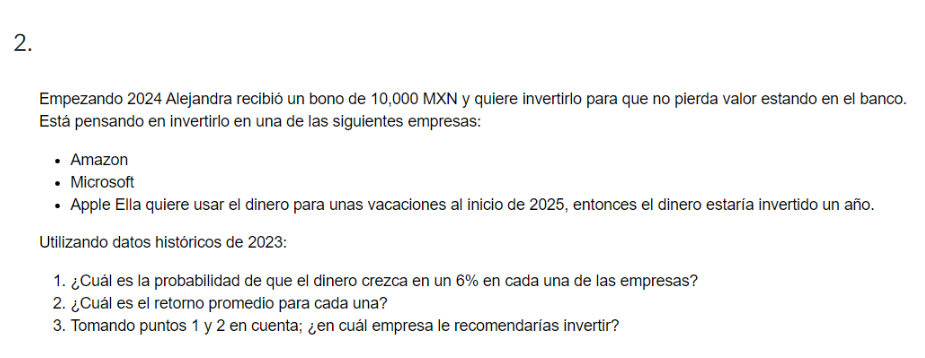

In [53]:
amzn= get_close("AMZN","2023-01-01","2023-12-31")
amzn

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2023-01-03 00:00:00-05:00,85.820000
2023-01-04 00:00:00-05:00,85.139999
2023-01-05 00:00:00-05:00,83.120003
2023-01-06 00:00:00-05:00,86.080002
2023-01-09 00:00:00-05:00,87.360001
...,...
2023-12-22 00:00:00-05:00,153.419998
2023-12-26 00:00:00-05:00,153.410004
2023-12-27 00:00:00-05:00,153.339996


In [54]:
msft= get_close("MSFT","2023-01-01","2023-12-31")
msft

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2023-01-03 00:00:00-05:00,237.036011
2023-01-04 00:00:00-05:00,226.667297
2023-01-05 00:00:00-05:00,219.949371
2023-01-06 00:00:00-05:00,222.541550
2023-01-09 00:00:00-05:00,224.708298
...,...
2023-12-22 00:00:00-05:00,373.888580
2023-12-26 00:00:00-05:00,373.968445
2023-12-27 00:00:00-05:00,373.379547


In [55]:
aapl= get_close("AAPL","2023-01-01","2023-12-31")
aapl

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2023-01-03 00:00:00-05:00,124.216301
2023-01-04 00:00:00-05:00,125.497498
2023-01-05 00:00:00-05:00,124.166641
2023-01-06 00:00:00-05:00,128.735245
2023-01-09 00:00:00-05:00,129.261627
...,...
2023-12-22 00:00:00-05:00,193.353287
2023-12-26 00:00:00-05:00,192.803986
2023-12-27 00:00:00-05:00,192.903839


In [56]:
ret_amzn = amzn.pct_change().dropna()
ret_amzn.head()

,Adj Close
Date,
2023-01-04 00:00:00-05:00,-0.007924
2023-01-05 00:00:00-05:00,-0.023726
2023-01-06 00:00:00-05:00,0.035611
2023-01-09 00:00:00-05:00,0.014870
2023-01-10 00:00:00-05:00,0.028732


In [57]:
ret_msft = msft.pct_change().dropna()
ret_msft.head()

,Adj Close
Date,
2023-01-04 00:00:00-05:00,-0.043743
2023-01-05 00:00:00-05:00,-0.029638
2023-01-06 00:00:00-05:00,0.011785
2023-01-09 00:00:00-05:00,0.009736
2023-01-10 00:00:00-05:00,0.007617


In [58]:
ret_aapl = aapl.pct_change().dropna()
ret_aapl.head()

,Adj Close
Date,
2023-01-04 00:00:00-05:00,0.010314
2023-01-05 00:00:00-05:00,-0.010605
2023-01-06 00:00:00-05:00,0.036794
2023-01-09 00:00:00-05:00,0.004089
2023-01-10 00:00:00-05:00,0.004456


In [59]:
def simR(media,std,start,dias,N):
    sim_R= np.random.normal(media,std,size=(dias,N))+1
    fechas= pd.date_range(start,periods=dias)
    return pd.DataFrame(sim_R,index=fechas)

In [61]:
simR_amzn= simR(ret_amzn.mean(),ret_amzn.std(),"2023-01-01",365,1000)
simR_amzn

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,0.985664,1.003295,1.005914,1.014888,0.993785,1.013383,1.007610,0.995378,1.022853,1.016942,...,1.016445,0.989355,1.038647,1.008949,0.945929,1.010397,1.020912,1.017185,1.006217,1.001239
2023-01-02,1.024625,0.992897,0.977294,1.024640,1.028547,1.007428,1.009396,0.999837,1.002162,1.010324,...,1.009501,0.987968,1.017977,0.999384,0.999038,1.018351,1.018983,0.979948,1.006314,1.051817
2023-01-03,0.974674,1.025009,0.982454,0.966120,0.989447,0.993424,0.945538,0.990539,1.009053,1.024778,...,0.973477,0.993855,1.006515,1.020955,1.004906,0.991267,1.015475,0.972872,0.986558,0.963895
2023-01-04,0.971791,0.988559,1.024586,0.996649,0.990815,1.022163,0.974652,1.024391,0.984564,1.031424,...,1.004028,1.010642,0.988594,1.018296,0.980520,0.981700,1.024799,1.006763,0.985512,1.015183
2023-01-05,0.991844,0.987116,1.012013,0.970684,1.000388,1.012769,1.021116,1.002503,1.004470,1.006579,...,0.991691,0.994379,1.027530,1.039636,0.995626,1.015334,1.010336,1.017098,1.009895,0.994729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,1.001958,1.017094,1.014599,0.988433,1.084513,1.014971,1.002631,0.985825,1.002064,1.031250,...,1.018329,1.009168,1.010763,0.993408,1.008961,0.980103,0.963278,1.026603,0.982121,1.017642
2023-12-28,1.008312,1.055469,0.968793,0.964027,1.018141,1.006978,1.036949,0.985536,1.030818,1.007631,...,1.003634,0.999583,0.988892,1.044526,1.003267,0.982891,0.981210,0.996844,1.010466,1.032479
2023-12-29,0.959459,1.024002,1.025465,0.968326,1.040982,1.023509,0.987672,1.012851,0.989809,0.997832,...,0.963235,1.013550,1.003461,1.011258,1.008797,1.023860,1.028134,0.960898,1.009282,1.025647
2023-12-30,0.975148,0.968523,0.961508,1.037760,1.019935,0.988646,1.006396,1.012074,1.018875,1.030108,...,1.009050,1.017959,1.006178,0.996303,1.005068,1.023067,1.033280,0.998015,0.972588,1.005637


In [62]:
simR_msft= simR(ret_msft.mean(),ret_msft.std(),"2023-01-01",365,1000)
simR_msft

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,0.982866,1.001929,1.035900,1.024266,1.021474,1.025401,0.998975,1.012046,1.011906,1.030303,...,1.000756,1.033143,1.007741,0.989845,0.970594,0.991544,1.014528,0.981408,1.003748,0.998731
2023-01-02,0.982955,1.001397,1.010516,1.007987,0.956176,1.028231,0.994924,1.015024,0.999035,0.993878,...,1.013145,1.010872,0.978443,1.016446,1.016356,1.001162,1.003291,0.990456,1.029832,0.974106
2023-01-03,0.998956,0.981295,0.978050,0.976099,1.006560,0.978847,1.034343,1.003178,0.989785,1.012172,...,1.004109,1.029903,0.975022,0.979725,1.001372,0.980779,1.017620,1.012869,0.988276,1.003896
2023-01-04,1.007327,1.010193,1.016887,1.001004,1.005490,1.013243,0.989845,1.022237,1.031999,1.005989,...,1.003042,0.977402,0.986204,1.015295,1.009012,1.002192,1.004374,1.013662,1.022934,0.998287
2023-01-05,1.007738,1.000775,0.988181,1.001506,1.000243,0.969067,1.014990,1.005657,0.960402,0.994681,...,0.968791,1.008446,0.970543,1.007799,0.989012,1.023598,1.012191,0.988885,0.995306,1.013199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,1.004542,1.021258,1.001572,0.995304,1.009907,1.020383,0.999277,0.976866,1.002467,1.008911,...,0.993223,0.996153,1.024043,0.984469,1.034968,0.995852,0.995442,0.995825,0.979906,0.998706
2023-12-28,1.038529,0.980373,1.015077,1.005970,0.997030,1.014521,1.034098,1.013236,0.963179,0.992047,...,0.999131,1.008505,0.981959,0.960723,1.018298,0.989668,0.998975,1.045605,0.999409,1.015297
2023-12-29,0.999574,0.997957,1.026104,1.017887,1.000546,1.033517,1.020489,0.986902,1.012416,1.003371,...,1.014791,0.981061,1.012328,0.991881,1.000464,1.009160,0.995783,1.013008,1.023076,1.000569
2023-12-30,1.009463,0.994982,0.997245,0.988585,0.989593,1.004678,0.992702,0.985686,0.999066,0.989454,...,0.997578,0.998438,0.978676,1.012116,1.000948,0.973453,0.966574,0.989003,1.017225,1.024038


In [63]:
simR_aapl= simR(ret_aapl.mean(),ret_aapl.std(),"2023-01-01",365,1000)
simR_aapl

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,0.998017,0.988915,1.008667,1.000828,1.022517,1.015138,1.003757,1.005846,1.043951,0.993998,...,1.023859,1.011913,1.007163,1.000918,0.995568,1.000844,0.998841,0.990325,0.990783,0.991886
2023-01-02,0.994720,0.983807,1.010930,1.005520,1.006793,1.011594,0.989842,1.000426,0.992962,0.994149,...,1.000887,1.008272,0.989904,1.013288,0.989159,1.030097,1.003107,0.994823,0.995929,0.972556
2023-01-03,1.002436,0.982515,0.999935,1.012269,0.995126,1.010921,0.990854,1.028241,1.015857,0.992256,...,0.995513,0.995574,0.982934,1.014100,1.001831,1.002270,0.998236,1.015076,0.981844,1.020358
2023-01-04,1.010789,0.979292,1.012375,0.987898,0.977804,0.988820,1.008392,0.988556,1.007201,0.987177,...,1.016841,0.987484,0.992393,0.988103,1.003336,0.992507,1.011727,1.008970,1.017456,1.001852
2023-01-05,0.983345,0.992831,0.985304,1.011960,0.974544,1.029764,0.991459,1.022135,0.992284,1.011310,...,1.008853,1.024646,1.009975,0.972231,0.977753,0.994885,1.002302,1.005115,1.026159,1.003927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,1.022809,0.996524,0.996285,1.022806,0.999745,1.004245,1.006055,1.008956,0.992180,1.006428,...,0.999891,0.977182,0.995823,1.017285,0.996402,0.975505,0.987066,1.006264,1.003462,0.983687
2023-12-28,1.012684,1.009058,1.021613,1.017800,1.015358,1.001524,1.006793,1.004139,1.020526,0.992086,...,1.029796,1.001559,0.980241,0.971440,1.023987,0.999741,0.986513,1.001900,1.032524,0.986482
2023-12-29,1.004357,1.018639,0.994827,1.021139,1.030042,0.995597,1.016540,1.005885,0.982081,1.018148,...,1.000627,1.001719,0.983962,1.013455,1.015315,0.999078,0.977962,1.016716,1.004737,1.002340
2023-12-30,0.987945,1.018561,1.003410,0.992012,1.006973,1.014046,0.985622,1.013177,0.999187,1.001155,...,0.993660,0.985763,0.989725,1.018889,1.023254,1.000419,0.989980,0.991570,0.993478,0.989562


In [64]:
amzn.iloc[-1]

Adj Close    151.940002
Name: 2023-12-29 00:00:00-05:00, dtype: float64

In [65]:
msft.iloc[-1]

Adj Close    375.345886
Name: 2023-12-29 00:00:00-05:00, dtype: float64

In [66]:
aapl.iloc[-1]

Adj Close    192.284637
Name: 2023-12-29 00:00:00-05:00, dtype: float64

In [67]:
preciosamzn=simR_amzn.cumprod()*151.940002
preciosamzn

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,149.761779,152.440712,152.838535,154.202154,150.995698,153.973491,153.096297,151.237664,155.412296,154.514169,...,154.438706,150.322640,157.811965,153.299766,143.724453,153.519656,155.117426,154.551044,152.884554,152.128325
2023-01-02,153.449681,151.357942,149.368220,158.001657,155.306238,155.117248,154.534750,151.213064,155.748225,156.109326,...,155.906042,148.513956,160.648961,153.205324,143.586260,156.336927,158.062086,151.452035,153.849902,160.011218
2023-01-03,149.563408,155.143279,146.747370,152.648616,153.667241,154.097124,146.118425,149.782510,157.158241,159.977364,...,151.770948,147.601367,161.695518,156.415679,144.290730,154.971589,160.508050,147.343417,151.781912,154.233965
2023-01-04,145.344362,153.368232,150.355241,152.137080,152.255854,157.512395,142.414648,153.435897,154.732420,165.004421,...,152.382319,149.172170,159.851297,159.277395,141.479928,152.135606,164.488549,148.339897,149.582916,156.575651
2023-01-05,144.158888,151.392204,152.161410,147.677053,152.314858,159.523663,145.421834,153.819991,155.424047,166.089923,...,151.116246,148.333676,164.251942,165.590494,140.861120,154.468426,166.188703,150.876229,151.062978,155.750263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,228.640056,546.590295,143.313847,544.590758,283.399852,445.164293,454.473491,317.038616,273.219732,610.687854,...,257.900319,289.505431,290.307141,466.921909,291.525926,457.679997,482.721666,316.713478,120.848136,214.582231
2023-12-28,230.540538,576.909062,138.841447,525.000436,288.541132,448.270838,471.265936,312.452856,281.639884,615.347792,...,258.837537,289.384810,287.082491,487.711989,292.478310,449.849474,473.651130,315.713820,122.112955,221.551727
2023-12-29,221.194309,590.756015,142.377000,508.371561,300.366144,458.809159,465.456261,316.468217,278.769600,614.013770,...,249.321277,293.306055,288.076133,493.202623,295.051226,460.583086,486.976836,303.368819,123.246411,227.233898
2023-12-30,215.697191,572.160959,136.896695,527.567795,306.353943,453.599914,468.433145,320.289220,284.031344,632.500418,...,251.577714,298.573516,289.855742,491.379062,296.546602,471.207314,503.183367,302.766676,119.868030,228.514712


In [68]:
preciosmsft=simR_msft.cumprod()*375.345886
preciosmsft

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,368.914783,376.069898,388.820666,384.453948,383.406146,384.879999,374.961013,379.867148,379.814885,386.720128,...,375.629659,387.786060,378.251548,371.534183,364.308562,372.171893,380.798744,368.367417,376.752531,374.869653
2023-01-02,362.626479,376.595411,392.909567,387.524593,366.603690,395.745456,373.057565,385.574385,379.448375,384.352525,...,380.567334,392.002008,370.097717,377.644280,370.267346,372.604466,382.051911,364.851895,387.991925,365.162849
2023-01-03,362.247854,369.551079,384.285335,378.262327,369.008503,387.374170,385.869506,386.799605,375.572352,389.031045,...,382.131130,403.724076,360.853442,369.987684,370.775520,365.442723,388.783626,369.547293,383.443113,366.585357
2023-01-04,364.901914,373.317793,390.774653,378.642080,371.034240,392.504019,381.951170,395.401047,387.590454,391.360851,...,383.293514,394.600832,355.875105,375.646518,374.116858,366.243954,390.484282,374.596191,392.236972,365.957540
2023-01-05,367.725503,373.607114,386.156258,379.212339,371.124313,380.362825,387.676481,397.637750,372.242547,389.279126,...,371.331178,397.933461,345.392106,378.576341,370.005901,374.886563,395.244523,370.432570,390.395793,370.787758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,574.013744,452.176009,529.628351,732.976470,864.021816,682.513397,773.670500,717.913829,1193.714388,224.239198,...,543.401736,535.643201,603.471804,875.482363,860.607739,549.497619,509.031426,807.226289,807.777128,868.961521
2023-12-28,596.130088,443.301311,537.613718,737.352543,861.455712,692.423882,800.051399,727.416434,1149.760874,222.455893,...,542.929377,540.199040,592.584791,841.096166,876.355216,543.820158,508.509654,844.039628,807.299498,882.253613
2023-12-29,595.876022,442.395585,551.647476,750.541561,861.926350,715.631770,816.443778,717.888710,1164.036719,223.205852,...,550.959815,529.968080,599.890163,834.267538,876.762043,548.801489,506.365119,855.018639,825.928408,882.755432
2023-12-30,601.514578,440.175488,550.127415,741.974083,852.956531,718.979229,810.485674,707.613175,1162.949522,220.851959,...,549.625565,529.140080,587.097943,844.375241,877.593364,534.232431,489.439350,845.616398,840.154959,903.974995


In [101]:
preciosaapl=(simR_aapl.cumprod()* 192.284637)
preciosaapl

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,191.903422,190.153224,193.951090,192.443821,196.614365,195.195382,193.007065,193.408685,200.735702,191.130608,...,196.872355,194.575322,193.661954,192.461092,191.432421,192.446869,192.061727,190.424366,190.512281,190.724385
2023-01-02,190.890206,187.074160,196.070934,193.506048,197.950024,197.458517,191.046439,193.491085,199.322996,190.012245,...,197.046965,196.184896,191.706771,195.018604,189.357054,198.239013,192.658499,189.438500,189.736623,185.490055
2023-01-03,191.355261,183.803080,196.058235,195.880227,196.985197,199.614981,189.299152,198.955523,202.483658,188.540833,...,196.162791,195.316573,188.435074,197.768289,189.703674,198.688975,192.318632,192.294461,186.291754,189.266228
2023-01-04,193.419818,179.996805,198.484469,193.509675,192.612897,197.383261,190.887834,196.678718,203.941678,186.123235,...,199.466453,192.872002,187.001610,195.415496,190.336538,197.200150,194.573945,194.019273,189.543700,189.616704
2023-01-05,190.198401,178.706453,195.567545,195.823991,187.709821,203.258210,189.257433,201.032289,202.368089,188.228323,...,201.232293,197.625596,188.866859,189.988934,186.102114,196.191500,195.021902,195.011612,194.501955,190.361279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,324.672235,371.837992,343.083478,214.413326,282.356475,483.962325,301.061079,443.117029,266.748688,626.863804,...,427.318652,339.174671,373.158571,276.468032,373.788995,338.421796,484.333844,355.089097,493.805480,349.142219
2023-12-28,328.790335,375.206268,350.498709,218.229790,286.692767,484.699949,303.106143,444.951227,272.224008,621.902808,...,440.051089,339.703610,365.785282,268.572048,382.755044,338.334055,477.801660,355.763815,509.866031,344.422496
2023-12-29,330.223031,382.199766,348.685552,222.842877,295.305489,482.565818,308.119523,447.569883,267.345943,633.189138,...,440.326996,340.287582,359.918997,272.185628,388.617051,338.022193,467.271865,361.710934,512.281386,345.228605
2023-12-30,326.242042,389.293767,349.874596,221.062712,297.364705,489.343792,303.689313,453.467301,267.128707,633.920732,...,437.535237,335.442793,356.220872,277.327070,397.653810,338.163721,462.589603,358.661582,508.940109,341.625080


Probabilidad de que crezca mas de un 6%

amazon 96%

In [71]:
(preciosamzn> 151.940002*1.06).mean(axis=1)

2023-01-01    0.004
2023-01-02    0.031
2023-01-03    0.066
2023-01-04    0.095
2023-01-05    0.143
              ...  
2023-12-27    0.966
2023-12-28    0.968
2023-12-29    0.966
2023-12-30    0.965
2023-12-31    0.965
Freq: D, Length: 365, dtype: float64

Microsoft 98.1%

In [72]:
(preciosmsft> 375.345886*1.06).mean(axis=1)

2023-01-01    0.000
2023-01-02    0.004
2023-01-03    0.020
2023-01-04    0.051
2023-01-05    0.081
              ...  
2023-12-27    0.982
2023-12-28    0.982
2023-12-29    0.981
2023-12-30    0.982
2023-12-31    0.981
Freq: D, Length: 365, dtype: float64

Apple 98.9%

In [73]:
(preciosaapl> 192.284637*1.06).mean(axis=1)

2023-01-01    0.000
2023-01-02    0.001
2023-01-03    0.009
2023-01-04    0.024
2023-01-05    0.046
              ...  
2023-12-27    0.990
2023-12-28    0.989
2023-12-29    0.991
2023-12-30    0.990
2023-12-31    0.989
Freq: D, Length: 365, dtype: float64

Retorno promedio

In [77]:
 preciosamzn.mean(axis=1)


2023-01-01    152.257438
2023-01-02    152.767161
2023-01-03    152.974321
2023-01-04    153.353038
2023-01-05    153.813304
                 ...    
2023-12-27    377.120702
2023-12-28    378.157629
2023-12-29    379.270573
2023-12-30    380.247329
2023-12-31    381.767906
Freq: D, Length: 365, dtype: float64

In [104]:
retorno_amazon= ((381.767906-151.940002)/151.940002)*100
retorno_amazon

151.26227522361094

In [82]:
preciosmsft.mean(axis=1)


2023-01-01    376.315329
2023-01-02    377.237101
2023-01-03    377.945637
2023-01-04    378.974745
2023-01-05    379.520064
                 ...    
2023-12-27    766.617411
2023-12-28    767.871624
2023-12-29    769.120752
2023-12-30    770.683223
2023-12-31    772.511480
Freq: D, Length: 365, dtype: float64

In [86]:
retorno_msft= (772.511480/375.345886-1)*100
retorno_msft

105.81322689653776

In [85]:
preciosaapl.mean(axis=1)

2023-01-01    192.691267
2023-01-02    193.072197
2023-01-03    193.282467
2023-01-04    193.603807
2023-01-05    193.895119
                 ...    
2023-12-27    371.861576
2023-12-28    372.271388
2023-12-29    373.196124
2023-12-30    373.755394
2023-12-31    374.527906
Freq: D, Length: 365, dtype: float64

In [102]:
retorno_aapl= (374.527906/192.284637-1)*100
retorno_aapl

94.77786257047669

Lo mejor es que invirtiera en Amazon ya que tiene un retorno mas alto